# Permute Package Software Contributions

In [1]:
import numpy as np
from permute.core import one_sample, one_sample_conf_int, one_sample_percentile, one_sample_percentile_ci
from numpy.random import RandomState
prng = RandomState()

## Main Contributions
1. One Sample Confidence Tests for Symmetric Distributions
2. One Sample Confidence Tests for Population Percentiles.
3. Confidence Tests for Regression
4. Hoeffding's Inequality
6. SPRT and Kaplan-Wald

## One Sample Test for Center of a Symmetric Distribution
With only assumptions of an i.i.d. sample $X_n$, how can we check whether our sample's center is the true center of the population given that it is symmetric about a given center $c$? 



## Motivation
* Gives us yet another way to predict the center of a distribution with little assumptions made about the distribution.
* A method for performing non-parametric paired tests.

## Hypothesis Test
* **$H_0$**: $\bar X = \mu$ 

* **$H_1$**: $\bar X \ne \mu$ 

## Symmetric Assumption
* There is an equal $\frac{1}{2}$ chance for a datapoint of a sample to be below or above $c$.



## Creating Samples
* Create samples $\hat X_n$ where each element of $X_n$ is permuted around $c$.
* For $\hat X_i$ ($i = 1, \ldots n$) , $\hat X_i = c + (X_i - c) \cdot (1 - 2 B(\frac{1}{2}))$

### P-Value (Alternative: Greater)
* $P(\bar X \gt \mu) \approx \frac{\#(\bar{\hat X_n} > \bar X_n)}{\#(\hat X_n)}$

### Code

In [ ]:
def one_sample(x, center=0, tst_fun=np.mean):
    tst = tst_fun(stat)
    hits = np.sum([
        tst_fun(
            center + (x - center) * (1 - 2 * prng.binomial(1, .5, size=n))
            ) >= tst
        for i in range(reps)
    ])
    return (hits / reps), tst

## Example

In [6]:
x = np.array(range(100))
print(one_sample(x, center=50, stat="mean", alternative = "greater"))
print(one_sample(x, center=45, stat="mean", alternative = "greater"))
print(one_sample(x, center=55, stat="mean", alternative = "greater"))

(0.56947000000000003, 49.5)
(0.06386, 49.5)
(0.96828999999999998, 49.5)


In [15]:
y = x - np.random.normal(1,5,100)
print(one_sample(x, y, center=1, alternative = "greater"))
print(one_sample(x, y, center=0, alternative = "greater"))

(0.64393, 0.8140158706349897)
(0.055489999999999998, 0.8140158706349897)


### Procedure

Start with an observed test statistic of the sample, $\bar x$.

To solve this, create a large number of samples $\hat x$ where data points of these new samples are either to the left or right of $c$. Through the null hypothesis of symmetry, for each data point, there is an equal chance for it to be $|x-c|$ to the left of $c$, or $|x-c|$ to the right of $c$. For each datapoint $x_i$ in a sample, the new sample data point would be $\hat x_i = c + (x_i - c) \cdot (1 - 2 B(\frac{1}{2}))$. Where $B(\frac{1}{2})$ is a Bernoulli random variable that is equal to 1 with chance $\frac{1}{2}$ and 0 otherwise.

With each of these new samples $\hat x$, the test statistic for center of each of the distributions will be computed and it would be checked whether the observed statistic is greater or less than the statistic of the new 'permuted' sample. If the alternative hypothesis is that the center of the sample is greater than the population center, 

The p value would be the number of observations where the observed center statistic is less than/greater than (Depending on the alternative of the test) the shuffled samples' center statistic over the total number of shuffles done.

## One Sample Test for Population Percentiles

* With only assumptions of an IID sample $X_n$, how can we find the chance that a value $\hat q_p$ is the $p$th percentile of the population?


## Test
* Use the test statistic $\hat X_p$, the observed number of values in $X_n$ at or below $\hat q_p$.
* $H_0: \hat X_p = X_{p}$
* $H_0: \hat X_p \ne X_{p}$

## Theory
* $X_p \sim Binom(n, \frac{p}{100})$

### Reframe to Inverted Binomial Confidence Test
If $q_p$ is the the $p$th percentile of the population distribution, then for every value observed from the population there is a $p$ chance that it would be at or below $q_p$ ($P(X <= q_p) = p$). That means that the distribution of the number of a datapoints in $X_n$ that are less than or equal to $q_p$ ($n_p$) is approximately $Binom(n, p)$. If $n_p$ is the number of values at or below $q_p$ in the sample, we can test if $q_p$ is the $p$th percentile by getting a cdf of $Binom(n, p)$ at $n_p$.

### Confidence Test
* Test statistic: The number of values of a sample at or below $q_p$, $n_p$.
* $X_{p0}$: The true number of values at or below the $p$th percentile of the population in a sample or size $n$.

**Null Hypothesis**
* $X_p = X_{p0}$

**Alternative Hypothesis**
* $X_p \ne X_{p0}$


In [ ]:
* Null- It would not be surprising to find $n_p$ values at or below $q_p$ in a sample.
* AlternativeIt would be surprising to find $n_p$ values at or below $q_p$ in a sample.

### P-value (Alternative: $ \hat X_p \lt X_{p}$)
* $P(X_{p} \le \hat X_{p}) \approx P(Binom(n,\frac{p}{100}) \le \hat X_{p}) = BinomCDF(\hat X_p, n, \frac{p}{100})$
* Reject if $P(X_{p} \le \hat X_{p}) <= \alpha$

## Code



In [ ]:
def one_sample_percentile(x, x_p, p=50):
    return binomial_p(np.sum(x <= x_p), len(x), p/100)


## Example

In [10]:
x = np.arange(0,100)
print(one_sample_percentile(x, 70, p=70, alternative="less"))
print(one_sample_percentile(x, 65, p=70, alternative="less"))
print(one_sample_percentile(x, 75, p=70, alternative="less"))

(0.62565000000000004, 71)
(0.22040999999999999, 66)
(0.92532000000000003, 76)


## Creating Confidence Bounds
* Use a root optimizer to fine tune confidence tests to a desired $\alpha$ value
* In Permute package: `scipy.optimize.brentq`

## Code

In [ ]:
def one_sample_conf_int(x, alternative ='two-sided')
    shift_limit = max(x) - min(x)
    cl = 1 - (1 - cl) / 2

    g = lambda q: cl - one_sample(z, alternative="less", seed=seed, \
        reps=reps, stat=stat, center=q)[0]
    ci_low = brentq(g, tst - 2 * shift_limit, tst + 2 * shift_limit)

    g = lambda q: cl - one_sample(z, alternative="greater", seed=seed, \
        reps=reps, stat=stat, center=q)[0]
    ci_upp = brentq(g, tst - 2 * shift_limit, tst + 2 * shift_limit)
    return [ci_low, ci_upp]

## Example

In [3]:
x = np.arange(100)
one_sample_conf_int(x, alternative="two-sided", stat="mean")

(43.775542578796106, 55.27670001983047)

In [4]:
# Paired Permutation Test
y = x - np.random.normal(1, 5, 100)
one_sample_conf_int(x, y, alternative="two-sided", stat="mean")

(-0.013193449423802388, 1.7622026211844226)

In [5]:
# Percentile Confidence Interval
one_sample_percentile_ci(x, p=70, alternative="two-sided")

(60.94747972728336, 77.16020888527758)

# Permutation Tests of Significance for Simple Linear Regression

We introduce a permutation based method to test the significance of the coefficient in a simple linear regression.

### Simple Linear Regression

- Have a data set with two variables $\{(x_i, y_i)\}_{i=1}^n$
- and we fit the regression equation
$$y_i = a + \beta x_i + \epsilon_i$$
 
- $\epsilon_i$ is the error term
-  $a$ and $\beta$ minimizes the sum of square differences: $\sum_{i=1}^n(y_i - a - \beta x_i)^2$.

### T-test 

Using this method you test the null hypothesis: $H_0 : \beta = 0$. Then using the standard error of the coefficient we can calculate the test statistic

$$se(\beta) = \sqrt{\frac{\frac{1}{n-2}\sum_{i=1}^n\epsilon_i^2}{\sum_{i=1}^n(x_i - \bar{x})}}, \quad\quad t^* = \frac{\beta}{se(\beta)}$$

However, these tests can only be carried out if we assume that the error terms, $\epsilon_i \sim \mathcal{N}(0, \sigma^2)$ 

### Permutation Method

Under the assumption of the null hypothesis $H_0:\beta = 0$, we see that our regression relationship becomes 

$$y_i = a + \epsilon_i$$

- This indicates that there is no relationship between the $x_i$'s and the $y_i$'s.

 - The idea is that we can shuffle the paired data and see what the regression coefficients. 
 - We expect them to be around the same.

 - We can generate a p-value by taking the fraction of occurrences where $|\beta_{\pi}| > |\beta|$ over a large number of trials of permuting the data, where $\beta_{\pi}$'s are the coefficients from the permuted data, and $\beta$ is the coefficient obtained from the original data. 

In [5]:
from regcoeff import reg_coeff
import numpy as np
from scipy.stats import linregress

x = np.array(range(100))
y = np.random.permutation(x)

reg_coeff(x, y, reps=1000)

0.959


In [6]:
x = np.array(range(100))
y = np.array(range(100))

reg_coeff(x, y, reps=1000)

0


## Hoeffding's Inequality for Confidence Bounds

Given a probability distribution, how likely is this distribution going to be close to its expectation? 

## Similar Flavors
- Markov Inequality
- Chebyshev's Inequality
- Now, Hoeffding's Inequality!

### Hoeffding's Inequality

Let $Z_1, \dots, Z_n$ be independent bounded random variables with $Z_i \in [a_i,b_i]$ for all $i$, where $-\infty < a \leq b < \infty$. Then
$$\mathbb{P}\left(\frac{1}{n}\sum_{i=1}^n(Z_i - \mathbb{E}[Z_i]) \geq t\right) \leq exp\left(-\frac{2n^2t^2}{\sum_{i=1}^n(b_i-a_i)^2}\right)$$
and 
$$\mathbb{P}\left(\frac{1}{n}\sum_{i=1}^n(Z_i - \mathbb{E}[Z_i]) \leq -t\right) \leq exp\left(-\frac{2n^2t^2}{\sum_{i=1}^n(b_i-a_i)^2}\right)$$
for all $t \geq 0$.


#### Deriving the Confidence Interval
$$\mathbb{P}\left(\frac{1}{n}\sum_{i=1}^n(Z_i - \mathbb{E}[Z_i]) \geq t\right) \leq exp\left(-\frac{2n^2t^2}{\sum_{i=1}^n(b_i-a_i)^2}\right)$$

Let

$$t = \sqrt{\frac{-\ln{(\alpha)}\sum_{i=1}^n(b_i-a_i)^2}{2n^2}}$$

Then we see that:

$$\mathbb{P}\left(\bar{Z} - \mu \geq \sqrt{\frac{-\ln{(\alpha)}\sum_{i=1}^n(b_i-a_i)^2}{2n^2}}\right) \leq exp\left( \frac{2n^2\ln{(\alpha)}\sum_{i=1}^n(b_i-a_i)^2}{2n^2\sum_{i=1}^n(b_i-a_i)^2}  \right) = e^{\ln(\alpha)} = \alpha$$

This gives us that the interval

$$\left[\bar{Z} - \sqrt{\frac{-\ln{(\alpha)}\sum_{i=1}^n(b_i-a_i)^2}{2n^2}}, \frac{1}{n}\sum_{i=1}^n b_i\right]$$

is a one-sided confidence interval with 1-$\alpha$ confidence interval.


We can do a similar computation to get the two-sided interval

$$\left[\bar{Z} - \sqrt{\frac{-\ln{\alpha}\sum_{i=1}^n(b_i-a_i)^2}{2n^2}}, \bar{Z} + \sqrt{\frac{-\ln{\alpha}\sum_{i=1}^n(b_i-a_i)^2}{2n^2}}\right]$$

In [4]:
import numpy as np
from hoeffding import hoeffding_conf_int

values = np.array([0.5]*10)
res = hoeffding_conf_int(values, 10, 0, 1, cl=0.95, alternative="two-sided")
res

(0.07053059165326248, 0.9294694083467375)


## SPRT
### When we talk about testing problems...
- Either accept or reject the null hypothesis
- Do we have enough data? Is the conclusion fair?

### What if we want to admit that we are not clear ...
- Set up threshold for acceptance and reject
- The remaining region is unclear

### Idea of Sequential Testing
Collection observation one at a time,
when $X_i = x_i$ has been observed, we choose to:
- Accept the null hypothesis and stop
- Reject the null hypothesis and stop
- or.. defer judgement until we have collected $X_{i+1}$

### Connecting to LRT
We consider a simple hypothesis $H_0: \theta = \theta_0$ against
a simple alternative $H_1: \theta = \theta_1$

$$\Lambda_n = \log \frac{L(\theta_1; X_1, ..., X_n)}{L(\theta_0; X_1, ..., X_n)}$$

- If $\Lambda_n < A$, decide that H0 is true and stop;
- If $\Lambda_n > B$, decide that H1 is true and stop;
- ... or we continue collecting observation

### Wald's SPRT Bound
$$A = \log \frac{β}{1 − α} \text{, } B = \log \frac{1 − β}{α}$$

We would want to control the two types of error:
1. $\alpha =$ Pr(Deciding for $H_1$ when $H_0$ is true)
2. $\beta =$ Pr(Deciding for $H_0$ when $H_1$ is true)

### Note
- SPRT can also be shown that the boundaries A and B can be
- Minimizes the average sample size before a decision 

### An Example of SPRT on Proportion
- 40% of the students in Andrew's section score above average.
- Andrew provides a review session so that more students can score abover average.
- His aim: 80% of the students will score above averge, or else the session is useless.
- $p_0=0.4$, $p_1=0.8$

<function __main__.sprt>

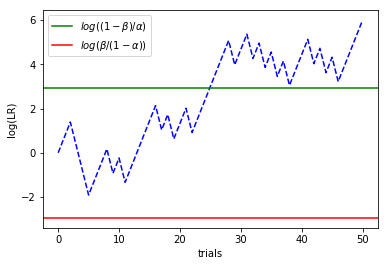

In [13]:
sprt(x, 0.4, 0.8, 0.05, 0.05, plot=True)

### Kaplan-Wald
We want to find the lower confidence bound for the mean of a nonnegative random variable

- We have a sequence of nonnegative random variables, iid, $X_1, \ldots, X_n$
- Drawn from the same distribution, $F$
- Thier common expection is $\mu \equiv \mathbb E X_i = \int_0^\infty x dF$


We make the hypothesis that $\mu = t$

$$
    1 =\frac{t}{\mu} =  t^{-1} \int_0^\infty  xdF(x) = \int_0^\infty xt^{-1} dF(x).
$$
Fix $\gamma \in [0, 1]$.

$$  
    \mathbb E \left (\frac{\gamma}{t} X_j + (1-\gamma) \right ) = \frac{\gamma}{t} \mathbb E X_j + (1-\gamma) =  
     \frac{\gamma}{t}t + (1-\gamma) = 1.
$$

$$
   \mathbb E \left (\frac{\gamma}{t} X_j + (1-\gamma) \right ) \equiv 
     \int_0^\infty \left (x \frac{\gamma}{t} + (1-\gamma) \right ) dF(x).
$$
Let $dG \equiv (x \frac{\gamma}{t} + (1-\gamma))dF$, then $G$ is the cdf of a nonnegative random variable Y.

\begin{align}
    \mathbb E Y  &= \int_0^\infty x dG(x) \\
                 &= \int_0^\infty x (x \frac{\gamma}{t} + (1-\gamma)) dF(x) \\
                 &= \frac{\gamma}{t} \int_0^\infty x^2 dF(x) + (1-\gamma) \int_0^\infty x dF(x) \\
                 &= \frac{\gamma}{t} \cdot \mathbb E X_j^2 + (1-\gamma) \cdot \mathbb E X_j \\
                 &\ge \gamma \cdot \mathbb E X_j + (1-\gamma) \cdot \mathbb E X_j \\
                 &\ge \mathbb E X_j.
\end{align}
Reminder: Jensen's inequality, $\mathbb E X_j^2 \ge (\mathbb E X_j)^2 = t \cdot \mathbb E X_j$ (by hypothesis ).

### What does $\mathbb E Y \ge \mathbb E X_j$ mean?
- $H_0$: {$X_j$} are iid with cdf F
- $H_1$: {$X_j$} are iid with cdf G
#### If we can reject the null, we have strong statistical evidence that $\mathbb E X_j > t$.

### $H_1$ versus $H_0$
$$
    \frac{dG(x_j)}{dF(x_j)} = \frac{(\frac{\gamma}{t}+(1−γ))dF(x_j)}{dF(x_j)} = (x_j\frac{\gamma}{t}+(1−γ))
$$
$$\Lambda_n = \Pi_{i=1}^n \left ((\frac{\gamma}{t}) X_i + 1 - \gamma \right)$$

- The LR does not depend on the distribution of F or G at all

### Bring in the SPRT, finally
Recall that the SPRT says if $\Lambda_n > \frac{1}{\alpha}$, (assuming $\beta = 0$), we reject the null and stop.

- $$
    \mbox{ Reject } H_0 \mbox{ if } \max_{m=1}^n \Pi_{i=1}^m \left [ \gamma X_i/t + 1 - \gamma \right ] \ge 1/\alpha.
$$
- Solve for root in the range $t \in [0, mean(X)]$